In [4]:
import os
import sys
sys.path.append(os.path.abspath(".."))  # Access ../sentiment folder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sentiment.analyzer import analyze_textblob, analyze_vader


In [2]:
df = pd.read_csv("../data/sample_reviews.csv", quotechar='"')
df.head()


,review
0,This product is amazing!
1,Worst experience ever.
2,"It’s okay, nothing special."
3,Absolutely loved it!
4,"Terrible service, never again."


In [5]:
df["textblob_sentiment"], df["textblob_score"] = zip(*df["review"].apply(analyze_textblob))
df["vader_sentiment"], df["vader_score"] = zip(*df["review"].apply(analyze_vader))
df.head()


,review,textblob_sentiment,textblob_score,vader_sentiment,vader_score
0,This product is amazing!,positive,0.750000,positive,0.6239
1,Worst experience ever.,negative,-1.000000,negative,-0.6249
2,"It’s okay, nothing special.",positive,0.428571,negative,-0.0920
3,Absolutely loved it!,positive,0.875000,positive,0.6689
4,"Terrible service, never again.",negative,-1.000000,negative,-0.4767


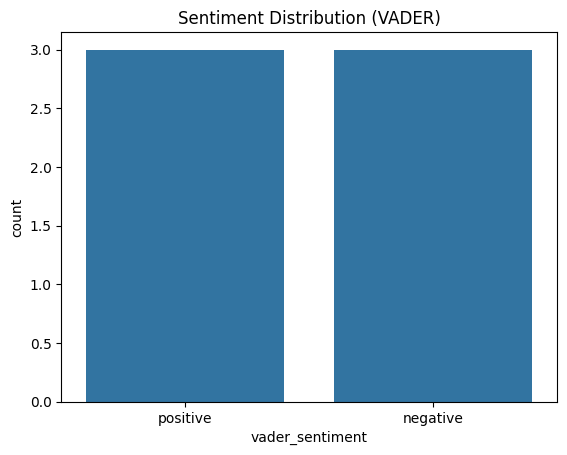

In [6]:
sns.countplot(x="vader_sentiment", data=df)
plt.title("Sentiment Distribution (VADER)")
plt.show()


In [8]:
df.to_csv("../output/sentiment_results.csv", index=False)
